In [2]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Loading the data
data0 = pd.read_csv("Dataset\Phishing Dataset.csv")
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [5]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [6]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [7]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

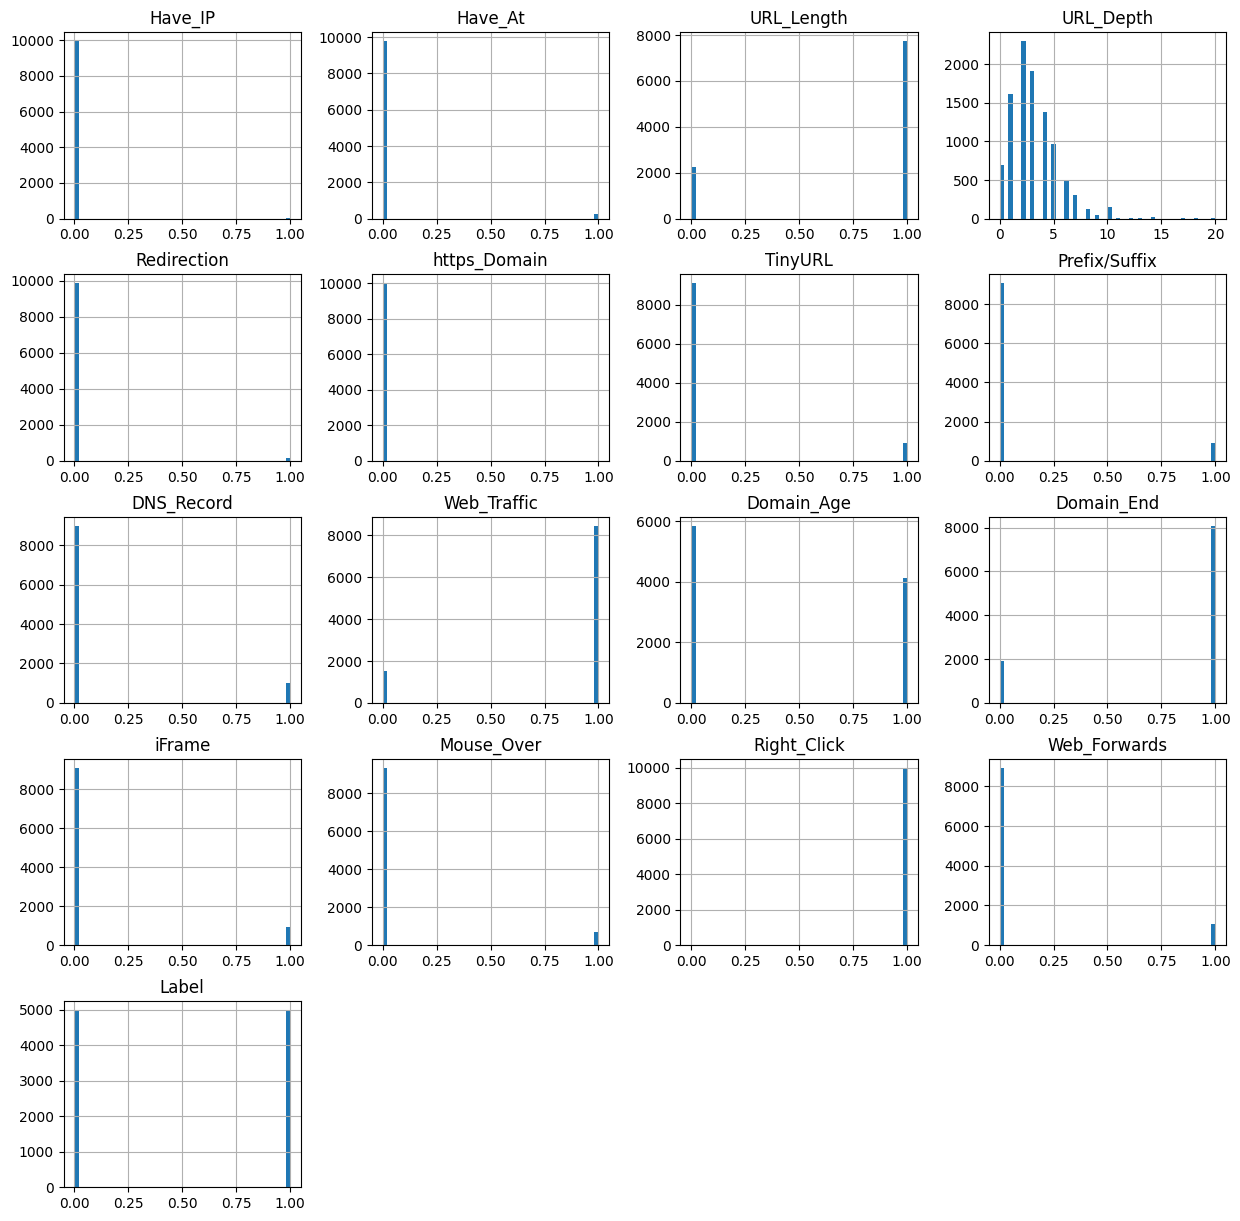

In [8]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [9]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [10]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,3,0,0,0,1,0,1,0,1,0,0,1,0,1
1,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,2,0,0,1,0,0,1,1,1,0,0,1,0,1
4,0,0,1,2,0,0,0,0,0,0,1,1,0,0,1,0,0


In [11]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [12]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [13]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
#importing packages
from sklearn.metrics import accuracy_score

In [15]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [16]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [17]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [18]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.812
Decision Tree: Accuracy on test Data: 0.813


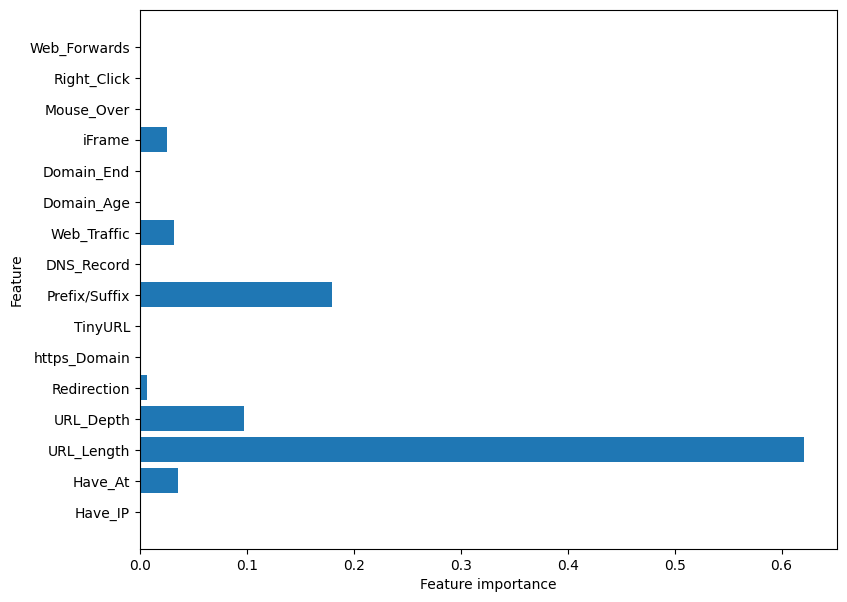

In [19]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [20]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [21]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [22]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [23]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.819
Random forest: Accuracy on test Data: 0.822


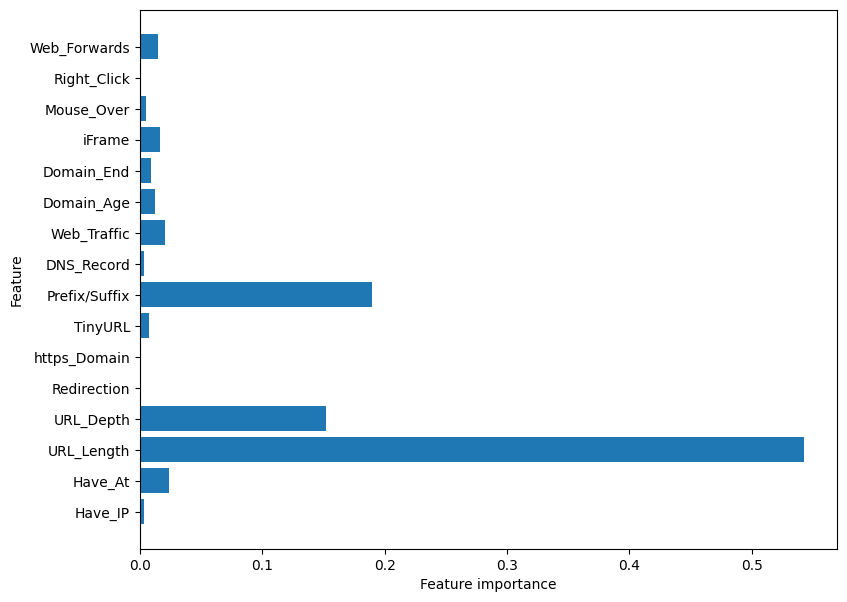

In [24]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [26]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [27]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [28]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.861
Multilayer Perceptrons: Accuracy on test Data: 0.859


In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [30]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [33]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.867
XGBoost : Accuracy on test Data: 0.865


In [34]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [36]:
%pip install keras


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 254.3 kB/s eta 0:00:04
   ---------------- ----------------------- 0.5/1.3 MB 254.3 kB/s eta 0:00:04
   ------------------------ --------------- 0.8/1.3 MB 322.6 kB/s eta 0:00:02
   -------------------------

In [38]:
%pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached wrapt-1.17.2-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.70.0-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
  Using cached charset_normalizer-3.4.1-cp310-cp310-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached w

  You can safely remove it manually.
  You can safely remove it manually.


In [39]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [40]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 14)             │           238 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,294 (5.05 KB)

 Trainable params: 1,294 (5.05 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0122 - loss: 5.0234 - val_accuracy: 0.0088 - val_loss: 4.3309
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0163 - loss: 4.1437 - val_accuracy: 0.0031 - val_loss: 4.0173
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0049 - loss: 3.7775 - val_accuracy: 0.0031 - val_loss: 3.8166
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0028 - loss: 3.6649 - val_accuracy: 0.0019 - val_loss: 3.7498
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0035 - loss: 3.5701 - val_accuracy: 0.0031 - val_loss: 3.6916
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0058 - loss: 3.5602 - val_accuracy: 0.0019 - val_loss: 3.6422
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 4.2982e-04 - loss: 3.5287 - val_accuracy: 0.0012 - val_loss: 3.6051
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0022 - loss: 3.4110 - val_accuracy

In [42]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0015 - loss: 3.1462
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0042 - loss: 3.0858

Autoencoder: Accuracy on training Data: 0.001
Autoencoder: Accuracy on test Data: 0.002


In [43]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

In [44]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [45]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [46]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.799
SVM : Accuracy on test Data: 0.814


In [47]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [48]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.812,0.813
1,Random Forest,0.819,0.822
2,Multilayer Perceptrons,0.861,0.859
3,XGBoost,0.867,0.865
4,AutoEncoder,0.001,0.002
5,SVM,0.799,0.814


In [49]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.867,0.865
2,Multilayer Perceptrons,0.861,0.859
1,Random Forest,0.819,0.822
5,SVM,0.799,0.814
0,Decision Tree,0.812,0.813
4,AutoEncoder,0.001,0.002


In [50]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [51]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
import pickle
import numpy as np
import pandas as pd

# Load the trained XGBoost model
model_filename = "XGBoostClassifier.pickle.dat"
loaded_model = pickle.load(open(model_filename, "rb"))

# Function to extract features manually for a given URL (adjust values accordingly)
def extract_features_from_url(url):
    # Dummy feature extraction (replace these values with actual computations)
    features = {
        "Have_IP": 0,  # Example: 1 if URL has an IP address instead of domain
        "Have_At": 0,  # 1 if '@' is present in URL
        "URL_Length": len(url),
        "URL_Depth": url.count('/'),
        "Redirection": url.count('//') - 1,
        "https_Domain": 1 if "https" in url else 0,
        "TinyURL": 1 if any(shortener in url for shortener in ["bit.ly", "goo.gl", "tinyurl"]) else 0,
        "Prefix/Suffix": 1 if "-" in url else 0,
        "DNS_Record": 1,  # Assume DNS record exists
        "Web_Traffic": 5,  # Placeholder value (normally from web traffic data)
        "Domain_Age": 365,  # Placeholder (days since domain creation)
        "Domain_End": 100,  # Placeholder (days until domain expiration)
        "iFrame": 0,  # 1 if the site uses iFrames
        "Mouse_Over": 0,  # 1 if it changes status bar on mouse hover
        "Right_Click": 0,  # 1 if right-click is disabled
        "Web_Forwards": 0  # 1 if too many redirects
    }

    # Convert to DataFrame and maintain feature order
    feature_order = [
        "Have_IP", "Have_At", "URL_Length", "URL_Depth", "Redirection",
        "https_Domain", "TinyURL", "Prefix/Suffix", "DNS_Record", "Web_Traffic",
        "Domain_Age", "Domain_End", "iFrame", "Mouse_Over", "Right_Click", "Web_Forwards"
    ]
    
    feature_values = np.array([features[f] for f in feature_order]).reshape(1, -1)
    return feature_values

# Function to predict if a given URL is phishing or legitimate
def predict_url(url):
    features = extract_features_from_url(url)
    prediction = loaded_model.predict(features)[0]
    return "Phishing" if prediction == 1 else "Legitimate"

# Example usage
test_url = "http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4"
print(f"Prediction for {test_url}: {predict_url(test_url)}")


Prediction for http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4: Phishing
